#**Author : Ankita Kokkera**

## Task 1 : Prediction using Supervised ML



> To Predict the percentage of marks of the students based on the number of hours they studied



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [2]:
path =  "http://bit.ly/w-data"
Data = pd.read_csv(path)
print("Data is successfully imported")
Data

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
# Check if there any null value in the Dataset
Data.isnull == True

False

### Since no null values, we can now visualize our Data.

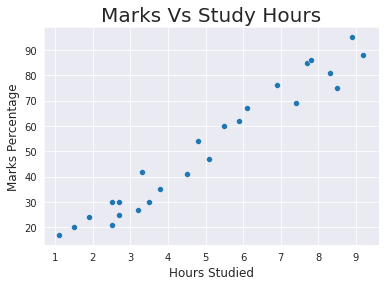

In [14]:
sns.set_style('darkgrid')
sns.scatterplot(y= Data['Scores'], x= Data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Regression Plot to confirm the Correlation

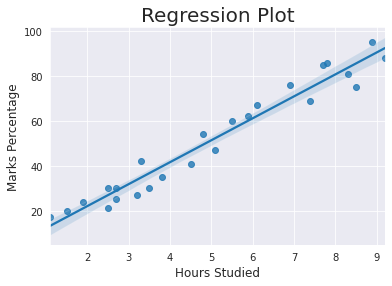

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
sns.regplot(x= Data['Hours'], y= Data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(Data.corr())

### Training the Model



> 1) Splitting the Data



In [23]:
X = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)



> 2) Fitting the Data into the model



In [26]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [27]:
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


### Percentage of marks prediction

In [29]:
pred_y = linreg.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033
5,3.8,39.678655
6,1.9,20.848407


### Comparing Predicted marks with Actual Marks

In [30]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033
5,35,39.678655
6,24,20.848407


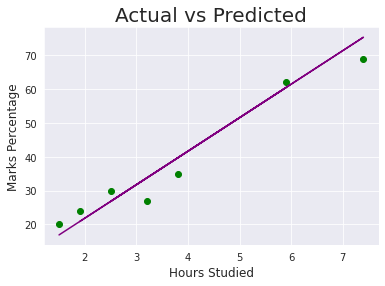

In [33]:
plt.scatter(x=val_X, y=val_y, color='Green')
plt.plot(val_X, pred_y, color='Purple')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Model Accuracy

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.1070781154621665




> Small value of Mean absolute error means that the chances of error through the model is very less.



## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [43]:
hours = [9.25]
answer = linreg.predict([hours])
print("predicted score for a student studying 9.25 hours = {}".format(round(answer[0],3)))

predicted score for a student studying 9.25 hours = 93.692


### From the above result we can say that if a studied for 9.25 then student will secured 93.692 MARKS.